In [680]:
import importlib
import pymate
import matplotlib.pyplot as plt
import random
pymate = importlib.reload(pymate)

In [685]:
pymate.seasonality = 1.0
pymate.number_generations = 1000
pymate.number_females = 10
pymate.number_males = 10
model = pymate.population()
#model.evolve()

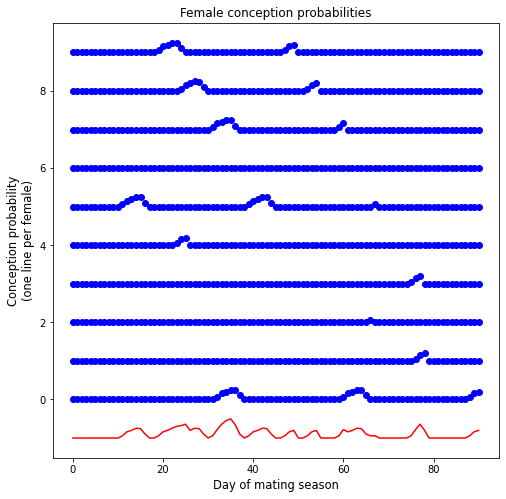

In [697]:
pymate.seasonality = 0.8
pymate.fixed_number_of_cycles = False

model = pymate.population()
model.groups[0].go_one_mating_season()
model.groups[0].plot_conception_probabilities((8,8))

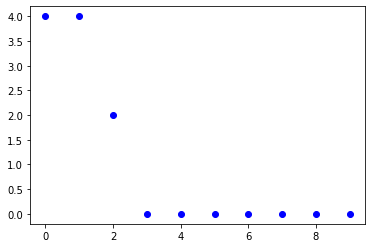

In [696]:
rs = [f.rank for f in model.groups[0].fathers]
rs = [rs.count(i) for i in range(10)]
plt.plot(rs,'bo')

([<matplotlib.axis.XTick at 0x7fab12b8e290>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

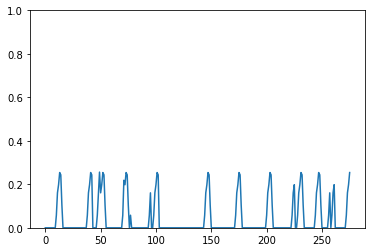

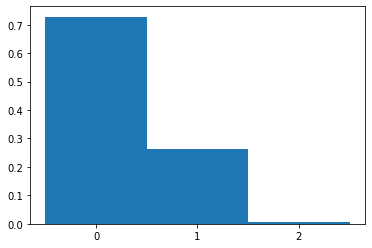

In [257]:
fig = plt.plot(model.groups[0].daily_conception_probability_sums)
plt.ylim([0,1])

fig2 = plt.figure()
plt.hist(model.groups[0].daily_conception_probability_counts, density = True, bins=np.arange(4)-0.5)
plt.xticks([0,1,2])

In [486]:
model.groups[0].plot_conception_probabilities(size=(5,500))


TypeError: plot_conception_probabilities() got an unexpected keyword argument 'size'

In [565]:
synchronies = [[],[],[]]
sds_of_fertile_female_counts = []

for n in range(10,101,10):
    for s in [_/100 for _ in range(0,91, 10)]:
        pymate.seasonality = s
        pymate.number_females, pymate.number_males = n,n
        synchronies[0].append(n)
        synchronies[1].append(s)
        model = pymate.population()
        model.groups[0].go_one_mating_season()

        i = 0 
        big_l = []

        for f in model.groups[0].females_finished_cycling:
            for m in f.menses_onset_days:
                for f1 in model.groups[0].females_finished_cycling[i+1:]:
                    l = []
                    for m1 in f1.menses_onset_days:
                        l.append(abs(m1-m))
                    big_l.append(min(l))
                i += 1
        big_l_mean = statistics.mean(big_l)
        synchronies[2].append(big_l_mean)
        
        sds_of_fertile_female_counts.append(statistics.stdev(
            [i for i in model.groups[0].daily_conception_probability_counts if i > 0]))


<AxesSubplot:xlabel='seasonality', ylabel='Number of Females'>

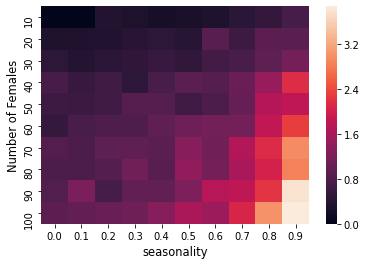

In [566]:
import seaborn as sns
df = pd.DataFrame({"Number of Females": synchronies[0],
                   "seasonality": synchronies[1],
                   "synchrony":sds_of_fertile_female_counts})

df = df.pivot("Number of Females", "seasonality", "synchrony")
sns.heatmap(df)

Text(0, 0.5, "Mean Days Between\nConspecific's Menses")

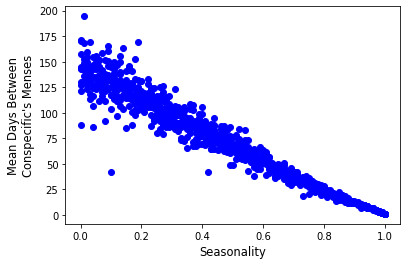

In [502]:
fig = plt.plot(sychronies[0],sychronies[1],'bo')
plt.xlabel("Seasonality")
plt.ylabel("Mean Days Between\nConspecific's Menses")

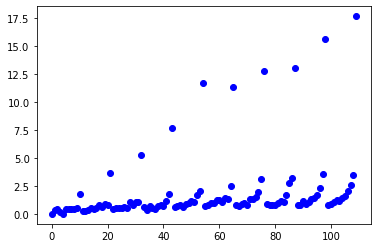

In [562]:
plt.plot(sds_of_fertile_female_counts,'bo')

In [791]:
pymate.number_females = 50
pymate.number_males = 50
pymate.seasonality = 0.0

model = pymate.population()
model.groups[0].go_one_mating_season()

l = [_ / pymate.number_females for _ in range(1, max(model.groups[0].daily_conception_probability_counts) + 1) ]
a = [[model.groups[0].daily_conception_probability_counts.count(
    i * pymate.number_females) / model.groups[
    0].day for i in l],l]

pymate.number_females = 50
pymate.number_males = 50
pymate.seasonality = 0.2
                                                            
model = pymate.population()
model.groups[0].go_one_mating_season()
                                                              
l = [_ / pymate.number_females for _ in range(1, max(model.groups[0].daily_conception_probability_counts) + 1)]                                                     
b = [[model.groups[0].daily_conception_probability_counts.count(
    i * pymate.number_females) / model.groups[0].day for i in l],l]                                                              

pymate.number_females = 50
pymate.number_males = 50
pymate.seasonality = 0.9
                                                            
model = pymate.population()
model.groups[0].go_one_mating_season()
                                                              
l = [_ / pymate.number_females for _ in range(1, max(model.groups[
    0].daily_conception_probability_counts) + 1)]                                                      
c = [[model.groups[0].daily_conception_probability_counts.count(
    i * pymate.number_females) / model.groups[0].day for i in l],l]
      
                                                              

In [665]:
len([(i-1)/(pymate.number_females-1) for i in model.groups[0].daily_conception_probability_counts if i > 1])

418

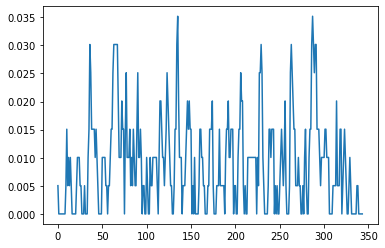

In [700]:
plt.plot([(i-1)/(pymate.number_females-1) for i in model.groups[0].daily_conception_probability_counts if i > 0])

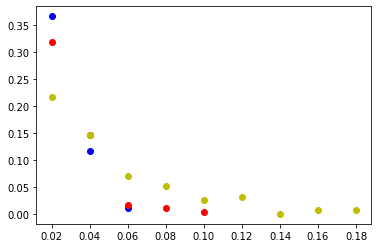

In [792]:
plt.plot(a[1],a[0], 'bo')

plt.plot(b[1],b[0], 'ro')

plt.plot(c[1], c[0], 'yo')

In [793]:
sum(np.array(a[0]) * np.array(a[1])) * pymate.number_males

0.6355140186915887

In [794]:
sum(np.array(b[0]) * np.array(b[1])) * pymate.number_males

0.7154255319148937

In [795]:
sum(np.array(c[0]) * np.array(c[1])) * pymate.number_males

1.3503184713375795

In [ ]:
k